## Importing libraries

In [347]:
import pandas as pd
import numpy as np
import nltk


## Load the data

Loading the jobs dataset

In [348]:
import random

In [349]:
df = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Combined_Jobs_Final.csv")
random.seed(2)
df_jobs = df.sample(n=1000)
df_jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
10675,151425,2,open,bandon-or-dollar-tree-stores-assistant-manager,ASSISTANT MANAGER @ Dollar Tree Stores,ASSISTANT MANAGER,Dollar Tree Stores,Bandon,Oregon,OR,...,NaN,Assistant Store Managers at Dollar Tree are re...,NaN,NaN,NaN,01-12-2015,Part-Time,Not Specified,2014-12-15 15:53:24 UTC,2014-12-15 15:53:24 UTC
13409,213825,1,open,silverlake-ca-orderahead-delivery-team-courier...,Delivery Team Couriers (Drivers and Bikers) @ ...,Delivery Team Couriers (Drivers and Bikers),OrderAhead,Silverlake,California,CA,...,Transportation,Join a team of delivery all stars! We are look...,NaN,NaN,2015-02-01 08:00:29 UTC,2015-03-01 08:00:29 UTC,Part-Time,NaN,2015-02-01 08:01:34 UTC,2015-02-01 08:01:34 UTC
23636,253165,2,open,denville-nj-officeteam-general-office-clerk-25...,General Office Clerk @ OfficeTeam,General Office Clerk,OfficeTeam,Denville,New Jersey,NJ,...,NaN,Ref ID: 02751-001638Classification: General Of...,NaN,NaN,27-02-2015,26-03-2015,Seasonal/Temp,Not Specified,2015-02-28 10:28:36 UTC,2015-02-28 10:28:36 UTC
77643,311408,2,open,indianapolis-in-st-vincent-hospice-hospice-cna...,Hospice CNA / In Patient Unirt @ St Vincent Ho...,Hospice CNA / In Patient Unirt,St Vincent Hospice,Indianapolis,Indiana,IN,...,NaN,POSITION SUMMARY\r\n&nbsp;\r\nUnder the superv...,NaN,NaN,10-04-2015,09-05-2015,Full-Time/Part-Time,Not Specified,2015-04-11 10:18:55 UTC,2015-04-11 10:18:55 UTC
81270,316463,2,open,georgetown-de-bayada-home-health-care-pediatri...,Pediatric – RN / LPN @ BAYADA HOME HEALTH CARE,Pediatric – RN / LPN,BAYADA HOME HEALTH CARE,Georgetown,Delaware,DE,...,NaN,Are you a RN / LPN interested in making a diff...,NaN,NaN,14-04-2015,13-05-2015,Full-Time/Part-Time,Associate Degree,2015-04-15 10:17:22 UTC,2015-04-15 10:17:22 UTC


In [350]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 10675 to 58421
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              1000 non-null   int64  
 1   Provider            1000 non-null   int64  
 2   Status              1000 non-null   object 
 3   Slug                1000 non-null   object 
 4   Title               1000 non-null   object 
 5   Position            1000 non-null   object 
 6   Company             974 non-null    object 
 7   City                999 non-null    object 
 8   State.Name          998 non-null    object 
 9   State.Code          998 non-null    object 
 10  Address             1 non-null      object 
 11  Latitude            1000 non-null   float64
 12  Longitude           1000 non-null   float64
 13  Industry            7 non-null      object 
 14  Job.Description     1000 non-null   object 
 15  Requirements        0 non-null      float64
 16  S

## Exploratory Data Analysis

#### First check the NA's

In [351]:
df_jobs.isnull().sum()

Job.ID                   0
Provider                 0
Status                   0
Slug                     0
Title                    0
Position                 0
Company                 26
City                     1
State.Name               2
State.Code               2
Address                999
Latitude                 0
Longitude                0
Industry               993
Job.Description          0
Requirements          1000
Salary                 996
Listing.Start           12
Listing.End              4
Employment.Type          2
Education.Required       7
Created.At               0
Updated.At               0
dtype: int64

 From the above list we see that there are lot of NaN values, perform data clean
 ing for each and every column

#### Selecting the columns for the jobs corpus


For this example we only consider the columns: 'Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Edu_req','Job_Description'

In [352]:

cols = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Job.Description']
df_jobs =df_jobs[cols]
df_jobs.columns = ['Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Job_Description']
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
10675,151425,ASSISTANT MANAGER @ Dollar Tree Stores,ASSISTANT MANAGER,Dollar Tree Stores,Bandon,Part-Time,Assistant Store Managers at Dollar Tree are re...
13409,213825,Delivery Team Couriers (Drivers and Bikers) @ ...,Delivery Team Couriers (Drivers and Bikers),OrderAhead,Silverlake,Part-Time,Join a team of delivery all stars! We are look...
23636,253165,General Office Clerk @ OfficeTeam,General Office Clerk,OfficeTeam,Denville,Seasonal/Temp,Ref ID: 02751-001638Classification: General Of...
77643,311408,Hospice CNA / In Patient Unirt @ St Vincent Ho...,Hospice CNA / In Patient Unirt,St Vincent Hospice,Indianapolis,Full-Time/Part-Time,POSITION SUMMARY\r\n&nbsp;\r\nUnder the superv...
81270,316463,Pediatric – RN / LPN @ BAYADA HOME HEALTH CARE,Pediatric – RN / LPN,BAYADA HOME HEALTH CARE,Georgetown,Full-Time/Part-Time,Are you a RN / LPN interested in making a diff...


In [353]:
# checking for the null values again.
df_jobs.isnull().sum()

Job.ID              0
Title               0
Position            0
Company            26
City                1
Empl_type           2
Job_Description     0
dtype: int64

#### Let´s check the NA's by plotting them

selecting NaN rows of city

In [354]:

df_nan_city = df_jobs[pd.isnull(df_jobs['City'])]
print(df_nan_city.shape)
df_nan_city.head()

(1, 7)


,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
3440,142061,Area Sales Representative @ CHI Payment Systems,Area Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."


In [355]:
df_nan_city.groupby(['Company'])['City'].count()

Company
CHI Payment Systems    0
Name: City, dtype: int64

#### We see that there are only 9 companies cities that are having NaN values so it must be manually adding their head quarters (by simply searching at google)


In [356]:
#replacing nan with thier headquarters location
df_jobs['Company'] = df_jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
df_jobs.loc[df_jobs.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
df_jobs.loc[df_jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
df_jobs.loc[df_jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
df_jobs.loc[df_jobs.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
df_jobs.loc[df_jobs.Company == 'Genesis Health System', 'City'] = 'Davennport'
df_jobs.loc[df_jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
df_jobs.loc[df_jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
df_jobs.loc[df_jobs.Company == 'Volvo Group', 'City'] = 'Washington'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [357]:
df_jobs.isnull().sum()

Job.ID              0
Title               0
Position            0
Company            26
City                0
Empl_type           2
Job_Description     0
dtype: int64

In [358]:
#The employement type NA are from Uber so I assume as part-time and full time
df_nan_emp = df_jobs[pd.isnull(df_jobs['Empl_type'])]
df_nan_emp.head()


,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
10771,153200,Driving Partner @ Uber,Driving Partner,Uber,Boston,NaN,Uber is changing the way the world moves. From...
10769,153198,Driving Partner @ Uber,Driving Partner,Uber,Los Angeles,NaN,Uber is changing the way the world moves. From...


In [359]:
df_jobs['Empl_type'].unique()

array(['Part-Time', 'Seasonal/Temp', 'Full-Time/Part-Time', 'Per Diem',
       'Intern', nan], dtype=object)

In [360]:
#replacing na values with part time/full time
df_jobs['Empl_type']=df_jobs['Empl_type'].fillna('Full-Time/Part-Time')
df_jobs.groupby(['Empl_type'])['Company'].count()
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
10675,151425,ASSISTANT MANAGER @ Dollar Tree Stores,ASSISTANT MANAGER,Dollar Tree Stores,Bandon,Part-Time,Assistant Store Managers at Dollar Tree are re...
13409,213825,Delivery Team Couriers (Drivers and Bikers) @ ...,Delivery Team Couriers (Drivers and Bikers),OrderAhead,Silverlake,Part-Time,Join a team of delivery all stars! We are look...
23636,253165,General Office Clerk @ OfficeTeam,General Office Clerk,OfficeTeam,Denville,Seasonal/Temp,Ref ID: 02751-001638Classification: General Of...
77643,311408,Hospice CNA / In Patient Unirt @ St Vincent Ho...,Hospice CNA / In Patient Unirt,St Vincent Hospice,Indianapolis,Full-Time/Part-Time,POSITION SUMMARY\r\n&nbsp;\r\nUnder the superv...
81270,316463,Pediatric – RN / LPN @ BAYADA HOME HEALTH CARE,Pediatric – RN / LPN,BAYADA HOME HEALTH CARE,Georgetown,Full-Time/Part-Time,Are you a RN / LPN interested in making a diff...


##  Creating the jobs corpus

#### combining the columns of position, company, city, emp_type and position

In [361]:
df_jobs["text"] = df_jobs["Position"].map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Empl_type']+" "+df_jobs['Job_Description'] +" "+df_jobs['Title']
df_jobs.head(2)

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description,text
10675,151425,ASSISTANT MANAGER @ Dollar Tree Stores,ASSISTANT MANAGER,Dollar Tree Stores,Bandon,Part-Time,Assistant Store Managers at Dollar Tree are re...,ASSISTANT MANAGER Dollar Tree Stores Bandon Pa...
13409,213825,Delivery Team Couriers (Drivers and Bikers) @ ...,Delivery Team Couriers (Drivers and Bikers),OrderAhead,Silverlake,Part-Time,Join a team of delivery all stars! We are look...,Delivery Team Couriers (Drivers and Bikers) Or...


In [362]:
df_all = df_jobs[['Job.ID', 'text', 'Title']]

df_all = df_all.fillna(" ")

df_all.head()

,Job.ID,text,Title
10675,151425,ASSISTANT MANAGER Dollar Tree Stores Bandon Pa...,ASSISTANT MANAGER @ Dollar Tree Stores
13409,213825,Delivery Team Couriers (Drivers and Bikers) Or...,Delivery Team Couriers (Drivers and Bikers) @ ...
23636,253165,General Office Clerk OfficeTeam Denville Seaso...,General Office Clerk @ OfficeTeam
77643,311408,Hospice CNA / In Patient Unirt St Vincent Hosp...,Hospice CNA / In Patient Unirt @ St Vincent Ho...
81270,316463,Pediatric – RN / LPN BAYADA HOME HEALTH CARE ...,Pediatric – RN / LPN @ BAYADA HOME HEALTH CARE


In [363]:
df_all.shape

(1000, 3)

In [364]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [365]:

from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)


#### Cleaning the jobs corpus

In [366]:
df_all['text'] = df_all['text'].apply(clean_txt)

#### Finally we ended we a clean text for the jobs dataset:

In [367]:
df_all.head()

,Job.ID,text,Title
10675,151425,assistant manager dollar tree store bandon par...,ASSISTANT MANAGER @ Dollar Tree Stores
13409,213825,delivery team couriers drivers bikers orderahe...,Delivery Team Couriers (Drivers and Bikers) @ ...
23636,253165,general office clerk officeteam denville seaso...,General Office Clerk @ OfficeTeam
77643,311408,hospice cna patient unirt vincent hospice indi...,Hospice CNA / In Patient Unirt @ St Vincent Ho...
81270,316463,pediatric lpn bayada home health care georgeto...,Pediatric – RN / LPN @ BAYADA HOME HEALTH CARE


####TF-IDF ( Term Frequency - Inverse Document Frequency )


In [368]:

#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
tfidf_jobid

<1000x7935 sparse matrix of type '<class 'numpy.float64'>'
	with 102041 stored elements in Compressed Sparse Row format>

In [369]:
# for i in range(1):
#     print(tfidf_jobid[i])
print(tfidf_jobid[0][0])
print(type(tfidf_jobid[0]))

  (0, 2394)	0.05713082964804583
  (0, 4960)	0.0406909784126469
  (0, 2488)	0.057931954353534085
  (0, 2481)	0.13455731010957528
  (0, 7070)	0.03729849467530739
  (0, 2427)	0.08778680763450283
  (0, 7854)	0.029609494991992665
  (0, 6559)	0.04168348329720849
  (0, 7890)	0.060707053583341594
  (0, 3761)	0.08387809354673463
  (0, 1364)	0.05365973833174559
  (0, 5592)	0.048989081563536076
  (0, 2916)	0.10275744151902473
  (0, 10)	0.10276276809115613
  (0, 5605)	0.0897318229440846
  (0, 5388)	0.13455731010957528
  (0, 833)	0.0926643602122243
  (0, 4468)	0.13455731010957528
  (0, 7555)	0.06488217668606686
  (0, 3199)	0.13455731010957528
  (0, 612)	0.07409134968273834
  (0, 2630)	0.06790711941695914
  (0, 4303)	0.09371080435146434
  (0, 6125)	0.05848467205208429
  (0, 5564)	0.06968239699571681
  :	:
  (0, 6421)	0.13455731010957528
  (0, 1735)	0.04162369998603245
  (0, 3063)	0.061344475612008585
  (0, 4105)	0.05157798635693078
  (0, 3281)	0.10218020119827247
  (0, 4286)	0.04376523527202329
  (0

In [370]:
from sklearn.cluster import KMeans

In [371]:
true_k = 3

In [372]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
# t0 = time()
km.fit(new_tfidf_jobid)
print("Sum of Squared Errors is:", km.inertia_)


c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of Squared Errors is: 2.3535547955728925e-05


In [373]:
# true_k = 6
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
# model.fit(tfidf_jobid)
# labels=model.labels_
# print(labels)
# wiki_cl=pd.DataFrame(list(zip(df_all['text'],labels)),columns=['title','cluster'])
# print(wiki_cl.sort_values(by=['cluster']))

In [374]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
# centroids = km.cluster_centers_
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: _______________________________________________________________________________
Cluster 1: _______________________________________________________________________________
Cluster 2: _______________________________________________________________________________


In [375]:
# centroids = km.cluster_centers_  # Remove the argsort part
# terms = tfidf_vectorizer.get_feature_names_out()

# for i in range(true_k):
#     print("Cluster %d:" % i, end='')
#     for term_weight in centroids[i, :10]:  # Loop directly through centroid values
#         term_index = np.where(centroids[i] == term_weight)[0][0]  # Find index of the term
#         print(' %s' % terms[term_index], end='')
#     print()

In [376]:
print(type(centroids))
print(len(centroids))
print(centroids[0])
print(len(centroids[1]))
print(centroids[1])
print(centroids[2])

<class 'numpy.ndarray'>
3
[0]
1
[0]
[0]


c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

Text(0, 0.5, 'Sum of Squared Errors')

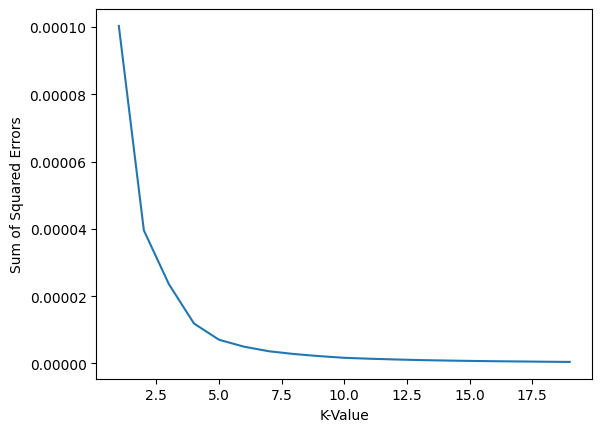

In [377]:
k = range(1,20)
sum_squared_errors = []

for i in k:
  model = KMeans(n_clusters = i,init='k-means++', max_iter=100 )
  model.fit_predict(new_tfidf_jobid)
  sum_squared_errors.append(model.inertia_)

plt.plot(k,sum_squared_errors)
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')

In [378]:
print(model.inertia_)

4.426447001433181e-07


In [379]:
import numpy
import matplotlib.pyplot as plt

from matplotlib.style import use
from metaheuristics.algorithm.abc import ABC
from metaheuristics.optimization.objection_function_ import QuantizationError
from metaheuristics.optimization.objection_function_ import SumOfSquaredErrors

In [380]:
def decode_centroids(centroids, n_clusters, data):
    return centroids.reshape(n_clusters, 1)

In [381]:
cents = km.cluster_centers_

In [382]:
print(type(tfidf_jobid))

<class 'scipy.sparse._csr.csr_matrix'>


In [383]:
new_tfidf_jobid = []
for jobdesc in tfidf_jobid:
  new_tfidf_jobid.append([jobdesc.mean()])

In [384]:
new_tfidf_jobid = numpy.array(new_tfidf_jobid)

In [385]:
objective_function = SumOfSquaredErrors(dim=3, n_clusters=3, data=new_tfidf_jobid)

In [386]:
optimizer = ABC(obj_function=objective_function, colony_size=30, n_iter=300, max_trials=100)

In [387]:
optimizer.optimize()

x is: [0.48835434 0.62071184 0.47570118]
<class 'numpy.ndarray'>
x is: [0.59243347 0.54590175 0.50639671]
<class 'numpy.ndarray'>
x is: [0.556932   0.63130226 0.1503579 ]
<class 'numpy.ndarray'>
x is: [0.808569   0.21171241 0.01804456]
<class 'numpy.ndarray'>
x is: [0.2569536  0.1667741  0.18452557]
<class 'numpy.ndarray'>
x is: [0.24191276 0.10006109 0.49835199]
<class 'numpy.ndarray'>
x is: [0.04589556 0.29927035 0.63493872]
<class 'numpy.ndarray'>


x is: [0.63591459 0.42304348 0.43228466]
<class 'numpy.ndarray'>
x is: [0.89943133 0.74051797 0.65584856]
<class 'numpy.ndarray'>
x is: [0.70917311 0.14573604 0.28470548]
<class 'numpy.ndarray'>
x is: [0.91679106 0.31139118 0.94734031]
<class 'numpy.ndarray'>
x is: [0.7525773  0.93408213 0.35679811]
<class 'numpy.ndarray'>
x is: [0.6962667  0.31156029 0.82335779]
<class 'numpy.ndarray'>
x is: [0.17076251 0.08420607 0.09892209]
<class 'numpy.ndarray'>
x is: [0.32618988 0.58819104 0.35968522]
<class 'numpy.ndarray'>
x is: [0.32806987 0.01277914 0.96303284]
<class 'numpy.ndarray'>
x is: [0.8163485  0.27836837 0.07772363]
<class 'numpy.ndarray'>
x is: [0.24906202 0.95246164 0.84035475]
<class 'numpy.ndarray'>
x is: [0.48092778 0.63062012 0.80870011]
<class 'numpy.ndarray'>
x is: [0.52011896 0.86613182 0.23201616]
<class 'numpy.ndarray'>
x is: [0.70978463 0.50565891 0.30951291]
<class 'numpy.ndarray'>
x is: [0.61651518 0.975286   0.53510503]
<class 'numpy.ndarray'>
x is: [0.792431   0.68278

In [388]:
centroids = dict(enumerate(decode_centroids(optimizer.optimal_solution.pos, n_clusters=3, data=new_tfidf_jobid)))
print(centroids)

{0: array([0.32806987]), 1: array([0.01277914]), 2: array([0.96303284])}


In [389]:
def assign_centroid(centroids, point):
    distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
    return np.argmin(distances)

In [390]:
custom_tgt = []
for instance in new_tfidf_jobid:
    # print(instance)
    custom_tgt.append(assign_centroid(centroids, instance[0]))

In [391]:
print(set(custom_tgt))

{1}


In [392]:
# colors = ['r', 'g', 'y']
# plt.figure(figsize=(9,8))
# for instance, tgt in zip(tfidf_jobid, custom_tgt):
#     plt.scatter(instance[0], instance[1], s=50, edgecolor='w', alpha=0.5)
# for centroid in centroids:
#     plt.scatter(centroids[centroid][0], centroids[centroid][1],
#                 color='k', marker='x', lw=5, s=500)
# plt.title('Partitioned Data found by ABC')

Text(0.5, 0, 'Iteration')

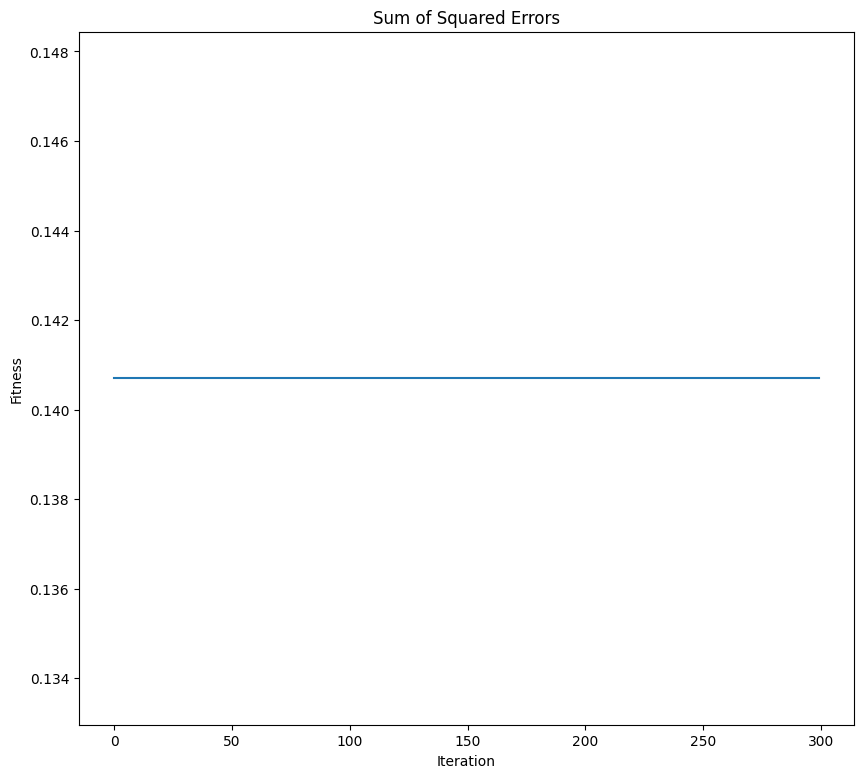

In [393]:
itr = range(len(optimizer.optimality_tracking))
val = optimizer.optimality_tracking
plt.figure(figsize=(10, 9))
plt.plot(itr, val)
plt.title('Sum of Squared Errors')
plt.ylabel('Fitness')
plt.xlabel('Iteration')

In [394]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [395]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [396]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [397]:
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import scipy

In [ ]:
arrays_of_list = tfidf_jobid.tolil().data
list_of_list = arrays_of_list.tolist()

In [ ]:
print(list_of_list[0])

[0.0830255831423132, 0.325325878549801, 0.10393778458475239, 0.06875841968245375, 0.05186689662716612, 0.10348202878666624, 0.13975459348701652, 0.07383646394440437, 0.08091323229027064, 0.0640663640330642, 0.17176245692528402, 0.07017312947757998, 0.03801211258714634, 0.051586316143992055, 0.06483098661281701, 0.325325878549801, 0.030689530104398247, 0.05565801153734859, 0.116133912727225, 0.10028648788924516, 0.06259738302859202, 0.223181432288947, 0.11274676277775546, 0.05534564428166872, 0.06140894348735485, 0.7154855301584309, 0.23849517671947698, 0.0287254275016071, 0.05084657228919795, 0.03262659681144902]


# Cretating the User Corpus
Let's Take the dataset called job views.

In [ ]:
df_job_view = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Job_Views.csv")
df_job_view.head(2)


,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC


In this case we will use only the columns 'Applicant.ID', 'Job.ID', 'Position', 'Company','City'

In [ ]:

df_job_view = df_job_view[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
df_job_view["select_pos_com_city"] = df_job_view["Position"].map(str) + "  " + df_job_view["Company"] +"  "+ df_job_view["City"]
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].map(str).apply(clean_txt)
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].str.lower()
df_job_view = df_job_view[['Applicant.ID','select_pos_com_city']]
df_job_view.head()


,Applicant.ID,select_pos_com_city
0,10000,cashier valet need wallypark newark
1,10000,macys seasonal retail fragrance cashier garden...
2,10001,part time showroom sales cashier grizzly indus...
3,10002,event specialist part time advantage sales mar...
4,10002,bonefish kitchen staff bonefish grill greenville


### Experience Dataset


In [ ]:
#Experience
df_experience = pd.read_csv("C:/Users/Srushti/Desktop/capstone/Experience.csv")
df_experience.head(2)

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC


In [ ]:
#taking only Position
df_experience= df_experience[['Applicant.ID','Position.Name']]
#cleaning the text
df_experience['Position.Name'] = df_experience['Position.Name'].map(str).apply(clean_txt)
df_experience.head()


,Applicant.ID,Position.Name
0,10001,account manager sales administration quality a...
1,10001,electronics technician item master controller
2,10001,machine operator
3,10003,maintenance technician
4,10003,electrical helper


In [ ]:
df_experience =  df_experience.sort_values(by='Applicant.ID')
df_experience = df_experience.fillna(" ")
df_experience.head()


,Applicant.ID,Position.Name
2763,2,volunteer
2762,2,writer uloop blog
3759,3,market intern
3758,3,server
3757,3,prep cook


same applicant has 3 applications 100001 in sigle line so we need to join them

In [ ]:
#adding same rows to a single row
df_experience = df_experience.groupby('Applicant.ID', sort=False)['Position.Name'].apply(' '.join).reset_index()
df_experience.head(5)

,Applicant.ID,Position.Name
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


### Position of Interest dataset

In [ ]:
#Position of interest
df_poi =  pd.read_csv("C:/Users/Srushti/Desktop/capstone/Positions_Of_Interest.csv", sep=',')
df_poi = df_poi.sort_values(by='Applicant.ID')
df_poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1158,153,Sales Rep,2014-08-14 15:56:47 UTC,2015-03-02 02:13:08 UTC


In [ ]:
df_poi = df_poi.drop('Updated.At', 1)
df_poi = df_poi.drop('Created.At', 1)

#cleaning the text
df_poi['Position.Of.Interest']=df_poi['Position.Of.Interest'].map(str).apply(clean_txt)
df_poi = df_poi.fillna(" ")
df_poi.head(10)

C:\Users\Srushti\AppData\Local\Temp\ipykernel_16440\1792386838.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_poi = df_poi.drop('Updated.At', 1)
C:\Users\Srushti\AppData\Local\Temp\ipykernel_16440\1792386838.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_poi = df_poi.drop('Created.At', 1)


,Applicant.ID,Position.Of.Interest
6437,96,server
1156,153,barista
1155,153,host
1154,153,server
1158,153,sales rep
1157,153,customer service rep
1952,256,host
1957,256,production area
1956,256,sales rep
1955,256,customer service rep


In [ ]:
df_poi = df_poi.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
df_poi.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,barista host server sales rep customer service...
2,256,host production area sales rep customer servic...
3,438,customer service rep barista host server
4,568,receptionist customer service rep book keeper


## Creating the final user dataset by merging all the users datasets

Merging jobs and experience dataframes

In [ ]:

df_jobs_exp = df_job_view.merge(df_experience, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp = df_jobs_exp.fillna(' ')
df_jobs_exp = df_jobs_exp.sort_values(by='Applicant.ID')
df_jobs_exp.head()

,Applicant.ID,select_pos_com_city,Position.Name
12370,2,,volunteer writer uloop blog
12371,3,,market intern server prep cook
12372,6,,project assistant
12373,8,,deli clerk server cashier food prep order taker
12374,11,,cashier


Merging position of interest with existing dataframe

In [ ]:

df_jobs_exp_poi = df_jobs_exp.merge(df_poi, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp_poi = df_jobs_exp_poi.fillna(' ')
df_jobs_exp_poi = df_jobs_exp_poi.sort_values(by='Applicant.ID')
df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest
0,2,,volunteer writer uloop blog,
1,3,,market intern server prep cook,
2,6,,project assistant,
3,8,,deli clerk server cashier food prep order taker,
4,11,,cashier,


combining all the columns

In [ ]:
df_jobs_exp_poi["text"] = df_jobs_exp_poi["select_pos_com_city"].map(str) + df_jobs_exp_poi["Position.Name"] +" "+ df_jobs_exp_poi["Position.Of.Interest"]

df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest,text
0,2,,volunteer writer uloop blog,,volunteer writer uloop blog
1,3,,market intern server prep cook,,market intern server prep cook
2,6,,project assistant,,project assistant
3,8,,deli clerk server cashier food prep order taker,,deli clerk server cashier food prep order tak...
4,11,,cashier,,cashier


Select only "Applicant.ID" and "text" columns:

In [ ]:
df_final_person= df_jobs_exp_poi[['Applicant.ID','text']]
df_final_person.head()

,Applicant.ID,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [ ]:
df_final_person.columns = ['Applicant_id','text']
df_final_person.head()

,Applicant_id,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [ ]:
df_final_person['text'] = df_final_person['text'].apply(clean_txt)
df_final_person.head()


C:\Users\Srushti\AppData\Local\Temp\ipykernel_16440\4089577716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_person['text'] = df_final_person['text'].apply(clean_txt)


,Applicant_id,text
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


### For test the recommender we select the user  which ID is 326

In [ ]:
u = 326
index = np.where(df_final_person['Applicant_id'] == u)[0][0]
user_q = df_final_person.iloc[[index]]
user_q

,Applicant_id,text
186,326,java developer


## The recommender systems


#### Computing cosine similarity using tfidf

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)


In [ ]:
print(user_tfidf)


  (0, 23985)	0.7479647932040747
  (0, 12245)	0.6637384033843347


In [ ]:
arrays_of_list = user_tfidf.tolil().data
lol = arrays_of_list.tolist()

In [ ]:
print(lol)

[[0.6637384033843347, 0.7479647932040747]]


In [ ]:
output2 = list(cos_similarity_tfidf)

###  Function to get the top-N recomendations order by score

In [ ]:

def get_recommendation(top, df_all, scores):
  recommendation = pd.DataFrame(columns = ['ApplicantID', 'JobID',  'title', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'ApplicantID'] = u
      recommendation.at[count, 'JobID'] = df_all['Job.ID'][i]
      recommendation.at[count, 'title'] = df_all['Title'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

## The top recommendations using TF-IDF

In [ ]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top,df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.749478
1,326,294684,Java Developer @ Kavaliro,0.740886
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.737007
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.671667
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.645037
5,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.625532
6,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.592291
7,326,245753,Java Administrator @ ConsultNet,0.530231
8,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.510534
9,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.486789


### Using Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_jobid = count_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
count_jobid

<84090x50754 sparse matrix of type '<class 'numpy.int64'>'
	with 8263698 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_q['text'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_jobid)


In [ ]:
output2 = list(cos_similarity_countv)

## The top recommendations using CountVectorizer

In [ ]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.635001
1,326,294684,Java Developer @ Kavaliro,0.600245
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.571726
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.496907
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.481757
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.454673
6,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.406017
7,326,245753,Java Administrator @ ConsultNet,0.378968
8,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.363216
9,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.323381
